In [260]:
import pandas as pd
import numpy as np

In [394]:
data = pd.read_csv('../Datasets/Iris.csv')

In [395]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [396]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [397]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [398]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [399]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [400]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [401]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [404]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score

In [405]:
features = ['sepal_length','petal_length',	'sepal_width','petal_width']
x = data[features]
y = data['species']

In [406]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [407]:
model = GaussianNB()

In [408]:
model.fit(x_train,y_train)

GaussianNB()

In [409]:
y_pred = model.predict(x_test)

In [410]:
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [411]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='species', ylabel='count'>

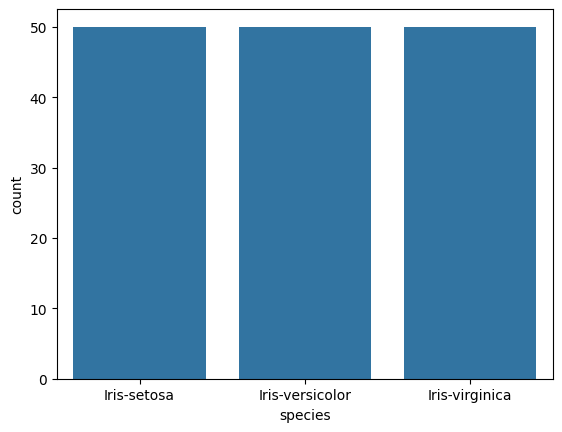

In [412]:
sns.countplot(data=data, x=data['species'])

In [371]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

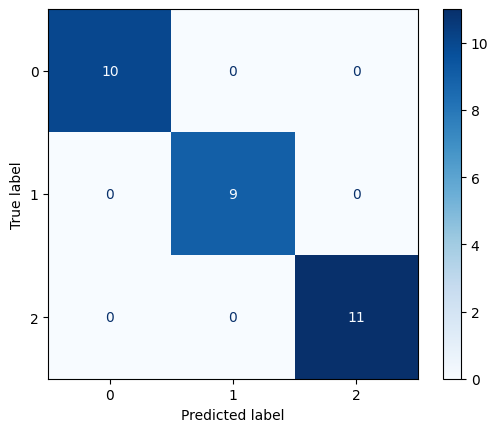

In [414]:
cm = confusion_matrix(y_test,y_pred)
cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmdisp.plot(cmap='Blues')

In [418]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
target_names = ['setosa', 'versicolor', 'virginica']
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [419]:
labels = ['Iris-setosa','Iris-versicolor ','Iris-virginica ']

cm  = confusion_matrix(y_test,y_pred)

i = 0

for label in labels:
    TP = cm[i,i]
    FN = cm[i,:].sum() - TP
    FP = cm[:,i].sum() - TP
    TN = cm.sum() - (TP+FP+FN)

    print(label)
    print("TP =",TP,"FP =",FP,"FN =",FN,"TN =",TN)

    accuracy = (TP+TN)/(TP+FP+FN+TN)
    precision = (TP)/(TP+FP)
    recall = TP/(TP+FN)
    error = 1-accuracy
    f1 = (2*precision*recall)/(precision+recall)

    print("Accuracy = ",accuracy)
    print("Precision = ",precision)
    print("Recall = ",recall)
    print("F1 = ",f1)

    i+=1

    print()
    

Iris-setosa
TP = 10 FP = 0 FN = 0 TN = 20
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 =  1.0

Iris-versicolor 
TP = 9 FP = 0 FN = 0 TN = 21
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 =  1.0

Iris-virginica 
TP = 11 FP = 0 FN = 0 TN = 19
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 =  1.0



In [420]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
precision = (TP)/(TP+FP)
recall = TP/(TP+FN)
error = 1-accuracy
f1 = (2*precision*recall)/(precision+recall)

In [389]:
print(accuracy)

0.825


In [390]:
print(precision)

0.796875


In [391]:
print(recall)

0.9807692307692307


In [392]:
print(error)

0.17500000000000004


In [393]:
print(f1)

0.8793103448275861
